In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Exercice 4 : impact et detection d'outliers



b_0=6.444812925757841 et b_1=5.234119808774288


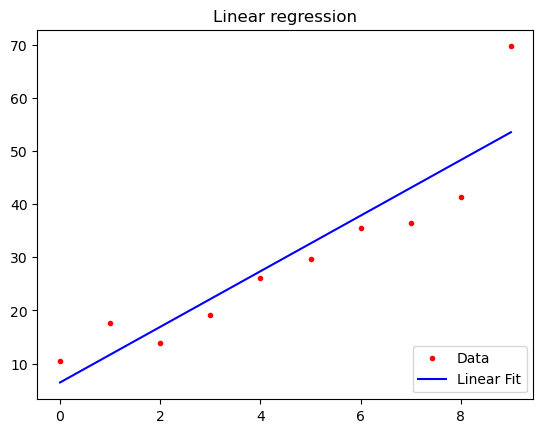

In [2]:
#generation de donnees test
def generate_data(n_samples, outlier=False, b_1=4.):
    x = np.arange(n_samples)
    y = 10. + b_1*x + np.random.randn(n_samples)*3.
    if outlier:
        y[-1] += 20
    return x, y

def s2(y_true, y_pred):
    n = len(y_true)
    SSE = np.sum((y_true - y_pred)**2)
    return SSE / (n-1)


x, y = generate_data(n_samples=10, outlier=True)
# instanciation de sklearn.linear_model.LinearRegression
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'

# representation du resultat

print('b_0='+str(lr.intercept_)+' et b_1='+str(lr.coef_[0]))

fig = plt.figure()
plt.plot(x, y, 'r.')
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


### <span style="color:blue">QUESTION 4.1 :</span> 


Remarquons que la ligne 'y[9]=y[9]+20' génere artificiellement une donnée aberrante.

Tester l'impact de la donnée aberrante en estimant b_0, b_1 et s^2 sur 
- 5 jeux de données générés comme dans la cellule précédente et
- 5 autres jeux aussi générés suivant cette méthode, mais sans la données aberrant (simplement ne pas executer la ligne y[9]=y[9]+20).

On remarque que $\beta_0 = 10$, $\beta_1 = 4$ et $\sigma=3$ dans les données simulees.


### <span style="color:blue">REPONSE 4.1 :</span> 



b_0=3.132938376770973, b_1=5.773656687376891 et s_2=38.80852035240151
b_0=4.850683420603744, b_1=5.531752561674089 et s_2=34.33357172942204
b_0=8.336322689764554, b_1=4.927262367927138 et s_2=44.76096608204729
b_0=4.533750691484585, b_1=5.560721015052509 et s_2=28.456137419637773
b_0=10.132813241566584, b_1=4.851734584899612 et s_2=15.767883311416556

b_0=10.970267852840028, b_1=3.8937657363804723 et s_2=6.223371861703977
b_0=11.405124832038048, b_1=3.4473775794115844 et s_2=8.259487161282289
b_0=9.785839572734663, b_1=3.9179257406692036 et s_2=6.183903826180932
b_0=12.071408577164705, b_1=3.5190259706636082 et s_2=8.752464007662045
b_0=10.958106366629146, b_1=4.152045592834361 et s_2=10.93617876834701


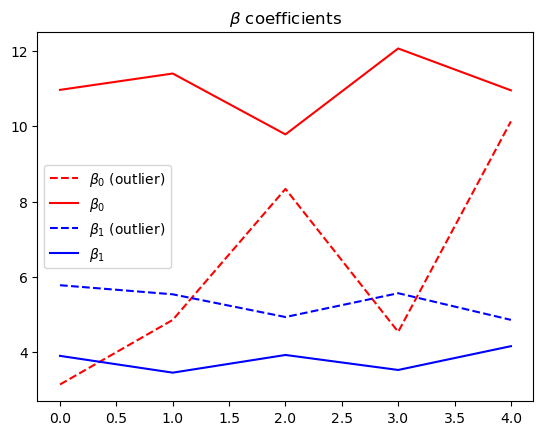

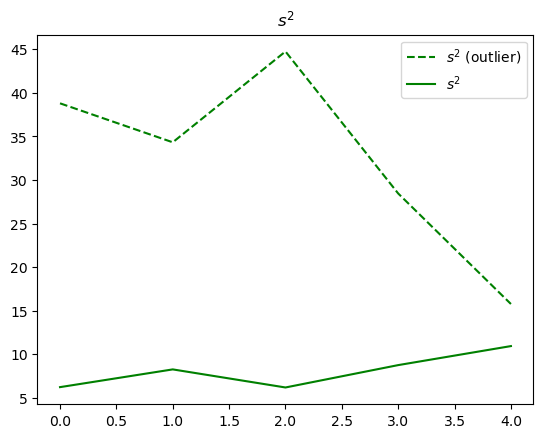

In [46]:
l_b_0_outlier = []
l_b_1_outlier = []
l_s_2_outlier = []
l_b_0 = []
l_b_1 = []
l_s_2 = []

for i in range(5):
    x, y = generate_data(n_samples=10, outlier=True)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    b_0 = lr.intercept_
    b_1 = lr.coef_[0]
    y_pred = lr.predict(x[:, np.newaxis])
    s_2 = s2(y, y_pred)

    # representation du resultat
    print('b_0='+str(b_0)+', b_1='+str(b_1)+' et s_2='+str(s_2))
    l_b_0_outlier.append(b_0)
    l_b_1_outlier.append(b_1)
    l_s_2_outlier.append(s_2)

print()
for i in range(5):
    x, y = generate_data(n_samples=10, outlier=False)
    # instanciation de sklearn.linear_model.LinearRegression
    lr = LinearRegression()
    lr.fit(x[:, np.newaxis], y)  # np.newaxis est utilise car x doit etre une matrice 2d avec 'LinearRegression'
    b_0 = lr.intercept_
    b_1 = lr.coef_[0]
    y_pred = lr.predict(x[:, np.newaxis])
    s_2 = s2(y, y_pred)

    # representation du resultat
    print('b_0='+str(b_0)+', b_1='+str(b_1)+' et s_2='+str(s_2))
    l_b_0.append(b_0)
    l_b_1.append(b_1)
    l_s_2.append(s_2)

fig = plt.figure()
plt.plot(np.arange(5), l_b_0_outlier, 'r--', label=r"$\beta_0$ (outlier)")
plt.plot(np.arange(5), l_b_0, 'r-', label=r"$\beta_0$")
plt.plot(np.arange(5), l_b_1_outlier, 'b--', label=r"$\beta_1$ (outlier)")
plt.plot(np.arange(5), l_b_1, 'b-', label=r"$\beta_1$")
plt.title(r"$\beta$ coefficients")
plt.legend()

fig = plt.figure()
plt.plot(np.arange(5), l_s_2_outlier, 'g--', label=r"$s^2$ (outlier)")
plt.plot(np.arange(5), l_s_2, 'g-', label=r"$s^2$")
plt.title(r"$s^2$")
plt.legend()

plt.show()

La variance estimée du bruit est beaucoup plus grande avec une donnée aberrante.
La donnée aberrante introiduit un biais dans l'estimation des statistiques b_0 et b_1.


### <span style="color:blue">QUESTIONS 4.2 :</span> 

#### <span style="color:blue">QUESTION 4.2.a :</span> 
Pour chaque variable $i$, calculez les profils des résidus $e_{(i)j}=y_j - \hat{y_{(i)j}}$ pour tous les $j$, où  $\hat{y_{(i)j}}$ est l'estimation de $y_j$ à partir d'un modele  linéaire appris sans l'observation $i$.
#### <span style="color:blue">QUESTION 4.2.b :</span> 
En quoi le profil des e_{(i)j} est différent pour i=9 que pour les autres i
#### <span style="color:blue">QUESTION 4.2.c :</span> 
Etendre ces calculs pour définir la distance de Cook de chaque variable i

AIDE : pour enlever un élement 'i' de 'x' ou 'y', utiliser x_del_i=np.delete(x,i) et y_del_i=np.delete(y,i) 


In [65]:
x, y = generate_data(n_samples=10, outlier=True)

#### <span style="color:blue">REPONSE 4.2.a :</span> 


In [55]:
def profil_residuel(x, y, i):
    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)

    lr = LinearRegression()
    lr.fit(x_del_i[:, np.newaxis], y_del_i)
    y_del_i_pred = lr.predict(x_del_i[:, np.newaxis])
    
    return [y[j] - y_del_i_pred[j] for j in range(len(y)-1)]

In [93]:
e = []

for i in range(len(y)):
    e_i = profil_residuel(x, y, i)
    e.append(e_i)

print(e)

[[np.float64(-3.2116101296317137), np.float64(-2.02944957898843), np.float64(-1.781451788091097), np.float64(-1.542346048415535), np.float64(-7.299272142021167), np.float64(-9.071512599231752), np.float64(-11.944156898469544), np.float64(-12.858292637186558), np.float64(-9.297897207050298)], [np.float64(2.1600940210531814), np.float64(-1.7821569957233443), np.float64(-1.574292770162259), np.float64(-1.375320595822945), np.float64(-7.172380254764825), np.float64(-8.984754277311659), np.float64(-11.897532141885698), np.float64(-12.85180144593896), np.float64(-9.331539581138948)], [np.float64(2.010891551510417), np.float64(3.1889810124324747), np.float64(-1.6153078128599567), np.float64(-1.3802731629056204), np.float64(-7.141270346232481), np.float64(-8.91758189316429), np.float64(-11.794297282123303), np.float64(-12.712504110561547), np.float64(-9.156179770146515)], [np.float64(1.8596041536237404), np.float64(3.0757084057585224), np.float64(3.3576498981473506), np.float64(-1.379501395941

#### <span style="color:blue">REPONSE 4.2.b :</span> 

Le profil résiduel de la donnée aberrante est toujours plus grand que les autres, en particulier lorsqu'on ôte la donnée de la base d'apprentissage.

In [90]:
def cook(x, y, i):
    x_del_i = np.delete(x,i)
    y_del_i = np.delete(y,i)

    lr = LinearRegression()
    lr_del_i = LinearRegression()

    lr.fit(x[:, np.newaxis], y)
    lr_del_i.fit(x_del_i[:, np.newaxis], y_del_i)

    y_pred = lr.predict(x[:, np.newaxis])
    y_del_i_pred = lr_del_i.predict(x[:, np.newaxis])

    somme = np.sum((y_pred - y_del_i_pred)**2)

    return (somme / (2 * s2(y, y_pred)))

#### <span style="color:blue">REPONSE 4.2.c :</span> 


In [92]:
l_cook = []

for i in range(len(y)):
    cook_i = cook(x, y, i)
    l_cook.append(cook_i)

print(l_cook)

[np.float64(0.012381765284276522), np.float64(0.028918336585129857), np.float64(0.022106792685656584), np.float64(0.017906196690939936), np.float64(0.008462974977240896), np.float64(0.023660169376413073), np.float64(0.08573330859873542), np.float64(0.16573564019321915), np.float64(0.07844312196998278), np.float64(2.1314999031670534)]


## Question Bonus

Pour un jeu de données de 20 observations obtenues avec un coefficient directeur $\beta_1$ de $0.2$, faire un test d'hypothèse pour vérifier que les données sont corrélées avec une confiance de 95%. 

On rappelle que sous les hypothèses suivantes : 
 * $\mathbb{E}[\epsilon_i] = 0$,
 * $\mathbb{V}[\epsilon_i] = \sigma^2$,
 * $\forall i \neq j, \: Cov(\epsilon_i, \epsilon_j) = 0$,
 
on a : 

* $\mathbb{E}[\hat{\beta_0}] = \beta_0$,
* $\mathbb{E}[\hat{\beta_1}] = \beta_1$,
* $\mathbb{V}[\hat{\beta_0}] = \sigma^2(\frac{1}{n} + \frac{\bar{x_n}^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\mathbb{V}[\hat{\beta_1}] = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}$

En faisant l'hypothèse supplémentaire que les erreurs suivent une loi normale, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, on a :

* $\hat{\beta_1} \sim \mathcal{N}(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2})$,
* $\frac{(n-2) \cdot s^2}{\sigma^2} \sim \mathcal{X}^2(n-2)$,
* $\hat{\beta_1}$ et $s^2$ indépendants,

où $s^2 = \frac{\sum_{i=1}^n \hat{\epsilon_i}^2}{n-2}$ est un estimateur non biaisé de $\sigma^2$.

On peut en déduire que:

$$ \frac{ \frac{ \hat{\beta_1}-\beta_1}{\sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x_n})^2}}}}{\sqrt{\frac{\frac{(n-2)s^2}{\sigma^2}}{n-2}}} = \frac{\hat{\beta_1}-\beta_1}{\frac{s}{\sqrt{\sum_{i=1}^n (x_i - \bar{x_n})^2}}} = T_n \sim T(n-2)$$ 

où $T(n-2)$ désigne la loi de Student à $n-2$ degrés de liberté, d'espérance nulle si $n-2 > 1$.

Tester l'hypothèse H_0 : $\beta_1 = 0$ en prenant un risque de 5%. 

In [ ]:
from scipy.stats import t


...